## Import all modules 

In [8]:
import pandas as pd 
import numpy as np 
import talib 
import matplotlib.pyplot as plt 
import logging 
from kiteconnect import KiteConnect
import webbrowser

# Import data 

Connecting to Kite -API ( kite is an API service provided by 
zerodha a stock brokerage firm in india)


In [10]:
api_key='enter your api key' 
api_secret='enter your api secret'
print(KiteConnect(api_key,api_secret).login_url())
webbrowser.open_new_tab(KiteConnect(api_key,api_secret).login_url())

# make object 

kite = KiteConnect(api_key=api_key)
data = kite.generate_session(((str(input("ENTER full link generated in URL :- ")).split("request_token=")[1]).split("&action"))[0],api_secret)
kite.set_access_token(data["access_token"])
print("success")

https://kite.trade/connect/login?api_key=jujhtxbvzn1pzsxw&v=3
ENTER full link generated in URL :- http://localhost:8000/?request_token=7Tci4gzaJaBUnuXSLhkX1UcXni5zdn5a&action=login&status=success
success


In [16]:
# finding the Instrument Token List of Zerodha 
token_list = pd.DataFrame(kite.instruments())
token_list.tail(20)

,instrument_token,exchange_token,tradingsymbol,name,last_price,expiry,strike,tick_size,lot_size,instrument_type,segment,exchange
62967,2996481,11705,XCHANGING,XCHANGING SOLUTIONS,0.0,,0.0,0.05,1,EQ,NSE,NSE
62968,2170113,8477,XELPMOC,XELPMOC DESIGN & TECH,0.0,,0.0,0.05,1,EQ,NSE,NSE
62969,2920193,11407,XPROINDIA,XPRO INDIA,0.0,,0.0,0.05,1,EQ,NSE,NSE
62970,3050241,11915,YESBANK,YES BANK,0.0,,0.0,0.05,1,EQ,NSE,NSE
62971,975873,3812,ZEEL,ZEE ENTERTAINMENT ENT,0.0,,0.0,0.05,1,EQ,NSE,NSE
62972,4283905,16734,ZEEL-P2,,0.0,,0.0,0.05,1,EQ,NSE,NSE
62973,5338113,20852,ZEELEARN,ZEE LEARN,0.0,,0.0,0.05,1,EQ,NSE,NSE
62974,3584769,14003,ZEEMEDIA,ZEE MEDIA CORPORATION,0.0,,0.0,0.05,1,EQ,NSE,NSE
62975,3727873,14562,ZENITHBIR,ZENITH BIRLA (INDIA),0.0,,0.0,0.05,1,EQ,NSE,NSE
62976,1069057,4176,ZENITHEXPO,ZENITH EXPORTS,0.0,,0.0,0.05,1,EQ,NSE,NSE


In [19]:
# Getting data for Yes Bank from_date 2020-04-01 to 2020-05-29 
instrument_token = '3050241'
from_date = "2020-04-01"
to_date = '2020-05-29'
interval = "minute"
df = kite.historical_data(instrument_token, from_date, to_date, interval, continuous=False, oi = False )

In [21]:
yes_bank = pd.DataFrame(df)
yes_bank.head()

,date,open,high,low,close,volume
0,2020-04-01 09:15:00+05:30,22.0,22.0,20.25,20.50,1880380
1,2020-04-01 09:16:00+05:30,20.5,21.0,20.45,20.85,756280
2,2020-04-01 09:17:00+05:30,20.9,20.9,20.65,20.80,602039
3,2020-04-01 09:18:00+05:30,20.8,20.9,20.65,20.70,527874
4,2020-04-01 09:19:00+05:30,20.7,20.7,20.50,20.60,758105


In [22]:
# setting the index to date 
yes_bank.set_index("date")

,open,high,low,close,volume
date,,,,,
2020-04-01 09:15:00+05:30,22.00,22.00,20.25,20.50,1880380
2020-04-01 09:16:00+05:30,20.50,21.00,20.45,20.85,756280
2020-04-01 09:17:00+05:30,20.90,20.90,20.65,20.80,602039
2020-04-01 09:18:00+05:30,20.80,20.90,20.65,20.70,527874
2020-04-01 09:19:00+05:30,20.70,20.70,20.50,20.60,758105
...,...,...,...,...,...
2020-05-29 15:25:00+05:30,26.80,26.80,26.75,26.80,73898
2020-05-29 15:26:00+05:30,26.80,26.80,26.75,26.80,81387
2020-05-29 15:27:00+05:30,26.80,26.85,26.75,26.80,114504


# Generating Strategy Signals 

In [30]:
# Calculate the Average True Range(ATR)
yes_bank['ATR'] = talib.ATR(yes_bank['high'], yes_bank['low'],
                        yes_bank['close'], timeperiod=30)
# Calculate the rolling mean of ATR
yes_bank['ATR_MA_5'] = yes_bank['ATR'].rolling(5).mean()
# Flag the minutes where ATR breaks out its rolling mean
yes_bank['ATR_breakout'] = np.where((yes_bank['ATR'] > yes_bank['ATR_MA_5']), True, False)
# Calculate the three-candle rolling high
yes_bank['three_candle_high'] = yes_bank['high'].rolling(3).max()
# Check if the fourth candle is higher than the highest of the previous 3 candle
yes_bank['four_candle_high'] = np.where( yes_bank['high'] >
    yes_bank['three_candle_high'].shift(1), True, False)
# Calculate the three-candle rolling low
yes_bank['three_candle_low'] = yes_bank['low'].rolling(3).min()
# Check if the fourth candle is lower than the lowest of the previous 3 candles
yes_bank['four_candle_low'] = np.where( yes_bank['low'] <
    yes_bank['three_candle_low'].shift(1), True, False)
# Flag long positions
yes_bank['long_positions'] = np.where(yes_bank['ATR_breakout'] & yes_bank['four_candle_high'], 1, 0)
# Flag short positions
yes_bank['short_positions'] = np.where(yes_bank['ATR_breakout'] & yes_bank['four_candle_low'], -1, 0)
# Combine long and short  position flags
yes_bank['positions'] = yes_bank['long_positions'] + yes_bank['short_positions']

In [36]:
current_position = 0
stop_loss = ''
take_profit = ''
entry_time = np.nan
entry_price = np.nan
take_profit_threshold = 0.03
stop_loss_threshold = 0.01

trades = pd.DataFrame()

# Calculate the PnL for exit of a long position
def long_exit(yes_bank, time, entry_time, entry_price):
    pnl = round(yes_bank.loc[time, 'close'] - entry_price, 2)
    return pd.DataFrame([('Long',entry_time,entry_price,time,yes_bank.loc[time, 'close'],pnl)])
    
# Calculate the PnL for exit of a short position
def short_exit(yes_bank, time, entry_time, entry_price):
    pnl = round(entry_price - yes_bank.loc[time, 'close'], 2)
    return pd.DataFrame([('Short',entry_time,entry_price,time,yes_bank.loc[time, 'close'],pnl)])


for time in yes_bank.index:
    # ---------------------------------------------------------------------------------
    # Long Position
    if (current_position == 0) and (yes_bank.loc[time, 'positions'] == 1):
        current_position = 1
        entry_time = time
        entry_price = yes_bank.loc[time, 'close']
        stop_loss = entry_price * (1-stop_loss_threshold)
        take_profit = entry_price * (1+take_profit_threshold)

    # ---------------------------------------------------------------------------------
    # Long Exit
    elif (current_position == 1):
        # Check for sl and tp
        if yes_bank.loc[time, 'close'] < stop_loss or yes_bank.loc[time, 'close'] > take_profit:
            trade_details = long_exit(yes_bank, time, entry_time, entry_price)
            trades = trades.append(trade_details,ignore_index=True)
            current_position = 0

    # ---------------------------------------------------------------------------------
    # Short Position
    if (current_position == 0) and (yes_bank.loc[time, 'positions'] == -1):
        current_position = -1
        entry_price = yes_bank.loc[time, 'close']
        stop_loss = entry_price * (1+stop_loss_threshold)
        take_profit = entry_price * (1-take_profit_threshold)

    # ---------------------------------------------------------------------------------
    # Short Exit
    elif (current_position == -1):
        # Check for sl and tp
        if yes_bank.loc[time, 'close'] > stop_loss or yes_bank.loc[time, 'close'] < take_profit:
            trade_details = short_exit(yes_bank, time, entry_time, entry_price)
            trades = trades.append(trade_details,ignore_index=True)
            current_position = 0

    # ---------------------------------------------------------------------------------

In [37]:
# Dataframe showing the details of the each trade in the dataset. 
trades.columns=['Position','Entry Time','Entry Price','Exit Time','Exit Price','PnL']
trades.head()

,Position,Entry Time,Entry Price,Exit Time,Exit Price,PnL
0,Long,38,23.40,71,24.25,0.85
1,Short,38,23.45,89,23.70,-0.25
2,Short,38,23.10,112,23.45,-0.35
3,Long,115,23.75,157,23.50,-0.25
4,Short,115,23.65,193,23.95,-0.30


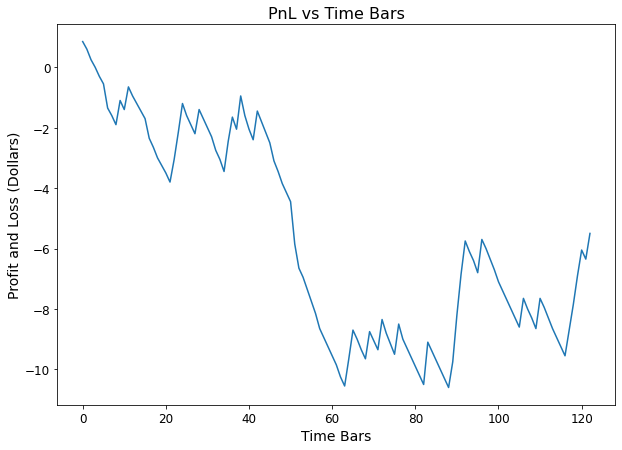

In [38]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("PnL vs Time Bars", fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel("Time Bars", fontsize=14)
plt.ylabel("Profit and Loss (Dollars)", fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

# Plotting the cumulation of the returns on the dataset
trades.PnL.cumsum().plot()

plt.show()

# Analytical Summary of scalping strategy 

In [39]:
analytics = pd.DataFrame(index=['ATR + Candle Breakout'])
# Number of long trades
analytics['num_of_long'] = len(trades.loc[trades.Position=='Long'])
# Number of short trades
analytics['num_of_short'] = len(trades.loc[trades.Position=='Short'])
# Total number of trades
analytics['total_trades'] = analytics.num_of_long + analytics.num_of_short
# Profitable trades
analytics['winners'] = len(trades.loc[trades.PnL>0])
# Loss-making trades
analytics['losers'] = len(trades.loc[trades.PnL<=0])
# Win percentage
analytics['win_percentage'] = 100*analytics.winners/analytics.total_trades
# Loss percentage
analytics['loss_percentage'] = 100*analytics.losers/analytics.total_trades
# Per trade profit/loss of winning trades
analytics['per_trade_PnL_winners'] = trades.loc[trades.PnL>0].PnL.mean()
# Per trade profit/loss of losing trades
analytics['per_trade_PnL_losers'] = trades.loc[trades.PnL<=0].PnL.mean()

analytics.T

,ATR + Candle Breakout
num_of_long,57.000000
num_of_short,66.000000
total_trades,123.000000
winners,29.000000
losers,94.000000
win_percentage,23.577236
loss_percentage,76.422764
per_trade_PnL_winners,0.967241
per_trade_PnL_losers,-0.356915


# Optimizing the Strategy 

In above strategy, our profit was much less as compared to wins. So we need to optimize our strategy. At the same time, we had our different fuctions for long short positions, and profit loss calculation, so we need to optimize the code as wells. So following optimization needed: 
1) Optimize the Exits Threshold 
2) Optimizing code i.e creating a single function for  entry signal generation, and PnL calculation in single function. 

In [40]:
def scalping_strategy(data, stop_loss_threshold, take_profit_threshold):
    # Calculate the Average True Range(ATR)
    data['ATR'] = talib.ATR(data['high'], data['low'],
                            data['close'], timeperiod=30)
    # Calculate the rolling mean of ATR
    data['ATR_MA_5'] = data['ATR'].rolling(5).mean()
    
    # Calculate the first minute where ATR breaks out its rolling mean
    data['ATR_breakout'] = np.where((data['ATR'] > data['ATR_MA_5']), True, False)    
    
    # Calculate the three-candle rolling high
    data['three_candle_high'] = data['high'].rolling(3).max()
    # Check if the fourth candle is higher than the highest of the previous 3 candles
    data['four_candle_high'] = np.where( data['high'] >
        data['three_candle_high'].shift(1), True, False)
    # Flag the long position signal
    data['long_positions'] = np.where(data['ATR_breakout'] & data['four_candle_high'], 1, 0)
    
    # Calculate the three-candle rolling low
    data['three_candle_low'] = data['low'].rolling(3).min()
    # Check if the fourth candle is lower than the lowest of the previous 3 candles
    data['four_candle_low'] = np.where( data['low'] <
        data['three_candle_low'].shift(1), True, False) 
    # Flag the short position signal    
    data['short_positions'] = np.where(data['ATR_breakout'] & data['four_candle_low'], -1, 0)
    # Combine the long and short flags
    data['positions'] = data['long_positions'] + data['short_positions']
    
    
    current_position = 0
    stop_loss = ''
    take_profit = ''
    entry_price = np.nan
    data['pnl'] = np.nan

    # Calculate the PnL for exit of a long position
    def long_exit(data, time, entry_price):
        pnl = round(data.loc[time, 'close'] - entry_price, 2)
        data.loc[time, 'pnl'] = pnl
        
    # Calculate the PnL for exit of a short position
    def short_exit(data, time, entry_price):
        pnl = round(entry_price - data.loc[time, 'close'], 2)
        data.loc[time, 'pnl'] = pnl

    for time in data.index:
        # ---------------------------------------------------------------------------------
        # Long Position
        if (current_position == 0) and (data.loc[time, 'positions'] == 1):
            current_position = 1
            entry_price = data.loc[time, 'close']
            stop_loss = data.loc[time, 'close'] * (1-stop_loss_threshold)
            take_profit = data.loc[time, 'close'] * (1+take_profit_threshold)

        # ---------------------------------------------------------------------------------
        # Long Exit
        elif (current_position == 1):
            # Check for sl and tp
            if data.loc[time, 'close'] < stop_loss or data.loc[time, 'close'] > take_profit:
                long_exit(data, time, entry_price)
                current_position = 0

        # ---------------------------------------------------------------------------------
        # Short Position
        if (current_position == 0) and (data.loc[time, 'positions'] == -1):
            current_position = data.loc[time, 'positions']
            entry_price = data.loc[time, 'close']
            stop_loss = data.loc[time, 'close'] * (1+stop_loss_threshold)
            take_profit = data.loc[time, 'close'] * (1-take_profit_threshold)

        # ---------------------------------------------------------------------------------
        # Short Exit
        elif (current_position == -1):
            # Check for sl and tp
            if data.loc[time, 'close'] > stop_loss or data.loc[time, 'close'] < take_profit:
                short_exit(data, time, entry_price)
                current_position = 0

        # ---------------------------------------------------------------------------------

                
    return data.pnl.sum()

# Test-Train split 
we will split the data set into training and testing 

In [41]:
train_test_split = int(yes_bank.shape[0]*2/3)
# Get the train data using the split index 
training_yesbank = yes_bank.iloc[0:train_test_split].copy()
# Get the test data using the split index 
test_yesbank = yes_bank.iloc[train_test_split:].copy()

# Exit Threshold  
we have a total of 13876 minutes of data. We will iterate over first two third of the data (training data) and calculate the Profit and loss for a given value of stop loss and take profit. 

In [43]:
# Set the range of stop-loss
stop_loss_range = np.arange(0.01,0.08,0.01)
# Set the range of take-profit
take_profit_range = np.arange(0.01,0.08,0.01)

# Empty numpy matrix to PnL for the training data for each combination of stop-loss and take-profit
PnL_grid = np.zeros((len(stop_loss_range),len(take_profit_range)))

max_ = -np.inf
best_params = None

# Iterating over stop-loss and take-profit values
for i,tp in enumerate(take_profit_range):
    for j,sl in enumerate(stop_loss_range):
        PnL_grid[i][j] = scalping_strategy(training_yesbank,sl,tp)
        # If for the current combination PnL is greater than current highest
        # We save the combination and the new high value 
        if PnL_grid[i][j] > max_:
            max_ = PnL_grid[i][j]
            best_params = (sl,tp)

In [44]:
print('The highest PnL: '+str(max_))
print('Optimal stop-loss and profit-taking values: '+str(best_params))

The highest PnL: 5.699999999999999
Optimal stop-loss and profit-taking values: (0.04, 0.05)


# Plotting the exit threshold grid 
#plot the threshold gird we obtained in the optimisation step above. 

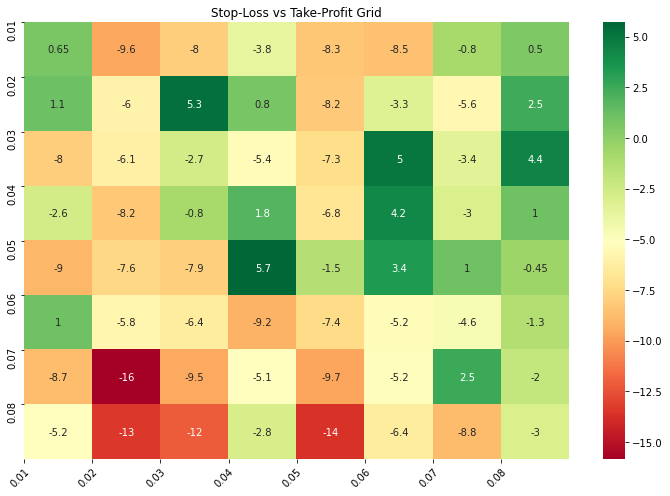

In [48]:
import matplotlib
import seaborn as sns

fig, ax = plt.subplots()
sns.heatmap(PnL_grid, annot=True, cmap="RdYlGn")

ax.set_xticks(np.arange(len(take_profit_range)))
ax.set_yticks(np.arange(len(stop_loss_range)))

# Label using the threshold ranges
ax.set_xticklabels([round(x,2) for x in take_profit_range])
ax.set_yticklabels([round(x,2) for x in stop_loss_range])

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
            
ax.set_title("Stop-Loss vs Take-Profit Grid")
fig.tight_layout()
plt.show()

We can see the maximum profit is on the right side of the grid. Profit can be seen in green, and lowest values can be seen in red or orange

## Optimal threshold testing

In the code below, we run the minute-level ATR scalping strategy for the last one-third minutes in the dataset. We return the PnL for the optimal take-profit and stop-loss we found using the brute force grid optimisation method. We also compare the PnL obtained from the manually set thresholds. 

In [74]:
# Manually set exit thresholds
take_profit = 0.04
stop_loss = 0.03

In [75]:
# Run the scalping strategy on the testing set using the previously set thresholds
PnL_unopt = scalping_strategy(test_yesbank,stop_loss,take_profit)
# Run the scalping strategy on the testing set using the optimised thresholds
PnL_opt = scalping_strategy(test_yesbank,best_params[0],best_params[1])
print('The average PnL on the last one-third minutes using preset thresholds: ' +str(PnL_unopt))
print('The average PnL on the last one-third minutes using optimal thresholds: ' +str(PnL_opt))

The average PnL on the last one-third minutes using preset thresholds: 2.6
The average PnL on the last one-third minutes using optimal thresholds: -0.95
